In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datagen import *
from plot import reward_3d
from fairopt import FairOptimization

# Univariate Loan Data

In [2]:
s, a, y = dat_gen_loan_univariate(
    6000, intcp=-1, beta_a=2, beta_s=1, lmbd_a=0.5
)
s_train, s_test = s[:5000], s[5000:]
a_train, a_test = a[:5000], a[5000:]
y_train, y_test = y[:5000], y[5000:]

## Linear reward function

In [3]:
r_star, r = dat_gen_reward_univariate_linear(
    s, a, y, intcp=-1, beta_a=2.5, beta_s=0
)
r_star_train, r_star_test = r_star[:5000], r_star[5000:]
r_train, r_test = r[:5000], r[5000:]

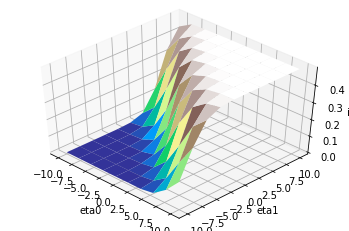

In [4]:
fairopt = FairOptimization(s_train, a_train, y_train, r_train)
reward_3d(fairopt, 'ipwe', [None, None], [(-10, 10), (-10, 10)])

In [5]:
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', bounds=[(-10, 10), (-10, 10)]).x
eval = fairopt.evaluate(eta_opt, s_test, a_test, y_test, r_test, r_star_test, ['cf', 'mae', 'ers'])
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=['ML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta'])

,ML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.302413,0.213399,0.002295,0.000006,0.000007,2.519489e-10
MAE,0.317574,0.328302,0.365385,0.370581,0.370580,2.530000e-01
E(R),0.368032,0.365819,0.343890,0.338778,0.338768,4.420000e-01


## Qudratic reward function

In [6]:
r_star, r = dat_gen_reward_univariate_quadratic(
    s, a, y, intcp=-1, beta_a=2.5, beta_s=0, beta_as=1, beta_q=0.1
)
r_star_train, r_star_test = r_star[:5000], r_star[5000:]
r_train, r_test = r[:5000], r[5000:]

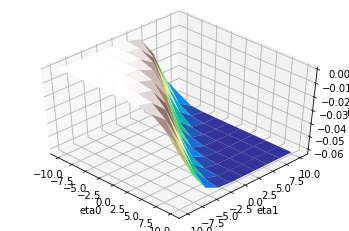

In [7]:
fairopt = FairOptimization(s_train, a_train, y_train, r_train)
reward_3d(fairopt, 'ipwe', [None, None], [(-10, 10), (-10, 10)])

In [8]:
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', bounds=[(-10, 10), (-10, 10)]).x
eval = fairopt.evaluate(eta_opt, s_test, a_test, y_test, r_test, r_star_test, ['cf', 'mae', 'ers'])
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=['ML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta'])


,ML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.302413,0.213399,0.002295,0.000006,0.000007,2.519489e-10
MAE,0.317574,0.328302,0.365385,0.370581,0.370580,7.470000e-01
E(R),-0.041646,-0.042755,-0.071591,-0.071419,-0.071435,-1.306030e-08


# Multivariate Loan data

In [9]:
s, a, y = dat_gen_loan_multivariate(
    6000, beta_e=1, beta_i=2, beta_s=[-1.5, -2.5, -1.5]
)
s_train, s_test = s[:5000], s[5000:]
a_train, a_test = a[:5000], a[5000:]
y_train, y_test = y[:5000], y[5000:]

## Linear reward function

In [10]:
r_star, r = dat_gen_reward_multivariate_linear(
    s, a, y, beta_e=2, beta_i=1, beta_s=[-2, -2, -2]
)
r_star_train, r_star_test = r_star[:5000], r_star[5000:]
r_train, r_test = r[:5000], r[5000:]

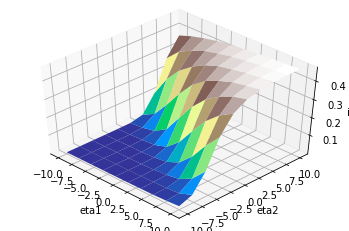

In [11]:
fairopt = FairOptimization(s_train, a_train, y_train, r_train)
reward_3d(fairopt, 'ipwe', [fairopt.ftup.params[0], None, None], [(-10, 10), (-10, 10)])

In [12]:
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', bounds=[(-10, 10), (-10, 10), (-10, 10)]).x
eval = fairopt.evaluate(eta_opt, s_test, a_test, y_test, r_test, r_star_test, ['cf', 'mae', 'ers'])
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=['ML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta'])

,ML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.454108,0.319917,0.026516,0.000200,0.000193,4.263479e-08
MAE,0.377075,0.388599,0.407314,0.408728,0.408784,3.809999e-01
E(R),0.235865,0.235665,0.231226,0.228937,0.228892,2.620001e-01


In [13]:
eta_opt = fairopt.optimize(fairopt.aipwe, method='shgo', bounds=[(-10, 10), (-10, 10), (-10, 10)]).x
eval = fairopt.evaluate(eta_opt, s_test, a_test, y_test, r_test, r_star_test, ['cf', 'mae', 'ers'])
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=['ML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta'])

,ML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.454108,0.319917,0.026516,0.000200,0.000193,0.000142
MAE,0.377075,0.388599,0.407314,0.408728,0.408784,0.388102
E(R),0.235865,0.235665,0.231226,0.228937,0.228892,0.253139


## Quadratic reward function

In [14]:
r_star, r = dat_gen_reward_multivariate_quadratic(
    s, a, y, beta_e=2, beta_e2=0.1, beta_i=1, beta_i2=-0.1, beta_ei= 0.5, 
    beta_s=[-2.5, -2, -2.5]
)
r_star_train, r_star_test = r_star[:5000], r_star[5000:]
r_train, r_test = r[:5000], r[5000:]

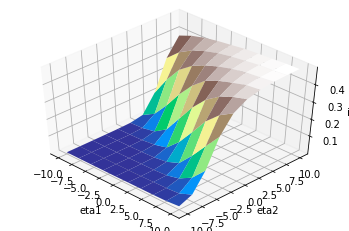

In [15]:
fairopt = FairOptimization(s_train, a_train, y_train, r_train)
reward_3d(fairopt, 'ipwe', [fairopt.ftup.params[0], None, None], [(-10, 10), (-10, 10)])

In [16]:
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', bounds=[(-1.6, -1.5), (-10, 10), (-10, 10)]).x
eval = fairopt.evaluate(eta_opt, s_test, a_test, y_test, r_test, r_star_test, ['cf', 'mae', 'ers'])
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=['ML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta'])

,ML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.454108,0.319917,0.026516,0.000200,0.000193,0.002186
MAE,0.377075,0.388599,0.407314,0.408728,0.408784,0.376445
E(R),0.240866,0.239790,0.236063,0.233519,0.233500,0.255577


In [17]:
eta_opt = fairopt.optimize(fairopt.aipwe, method='shgo', bounds=[(-1.6, -1.5), (-10, 10), (-10, 10)]).x
eval = fairopt.evaluate(eta_opt, s_test, a_test, y_test, r_test, r_star_test, ['cf', 'mae', 'ers'])
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=['ML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta'])

,ML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.454108,0.319917,0.026516,0.000200,0.000193,0.002194
MAE,0.377075,0.388599,0.407314,0.408728,0.408784,0.376441
E(R),0.240866,0.239790,0.236063,0.233519,0.233500,0.255580
